In [ ]:
pip install bioread

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pylab inline
import bioread
pylab.rcParams['figure.figsize'] = (14.0, 12.0)  # Make figures a bit bigger

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# This file is included in bioread
data = bioread.read_file('/content/drive/MyDrive/Iqram Sir/driving_simlulation/rest.acq')

In [ ]:
data

AcqKnowledge file (rev 108): 6 channels, 1000.0 samples/sec

In [ ]:

data.channels

[Channel EEG-Fz - EEG100C: 65637 samples, 1000.0 samples/sec, loaded: True,
 Channel EEG-Oz - EEG100C: 65637 samples, 1000.0 samples/sec, loaded: True,
 Channel EOG - EOG100C: 65637 samples, 1000.0 samples/sec, loaded: True,
 Channel ECG - ECG100C: 65637 samples, 1000.0 samples/sec, loaded: True,
 Channel GSR - GSR100C: 65637 samples, 1000.0 samples/sec, loaded: True,
 Channel SKT - SKT100C: 65637 samples, 1000.0 samples/sec, loaded: True]

In [ ]:
for chan in data.channels:
  print(chan.data,chan.time_index,chan.name,chan.units)
  break

[0.08331299 0.08480835 0.08203125 ... 0.06481934 0.05889893 0.05335999] [0.00000000e+00 1.00001524e-03 2.00003047e-03 ... 6.56350000e+01
 6.56360000e+01 6.56370000e+01] EEG-Fz - EEG100C mV


In [ ]:
chan.data[:10]

array([0.08331299, 0.08480835, 0.08203125, 0.07830811, 0.07463074,
       0.07385254, 0.07527161, 0.07720947, 0.07737732, 0.07595825])

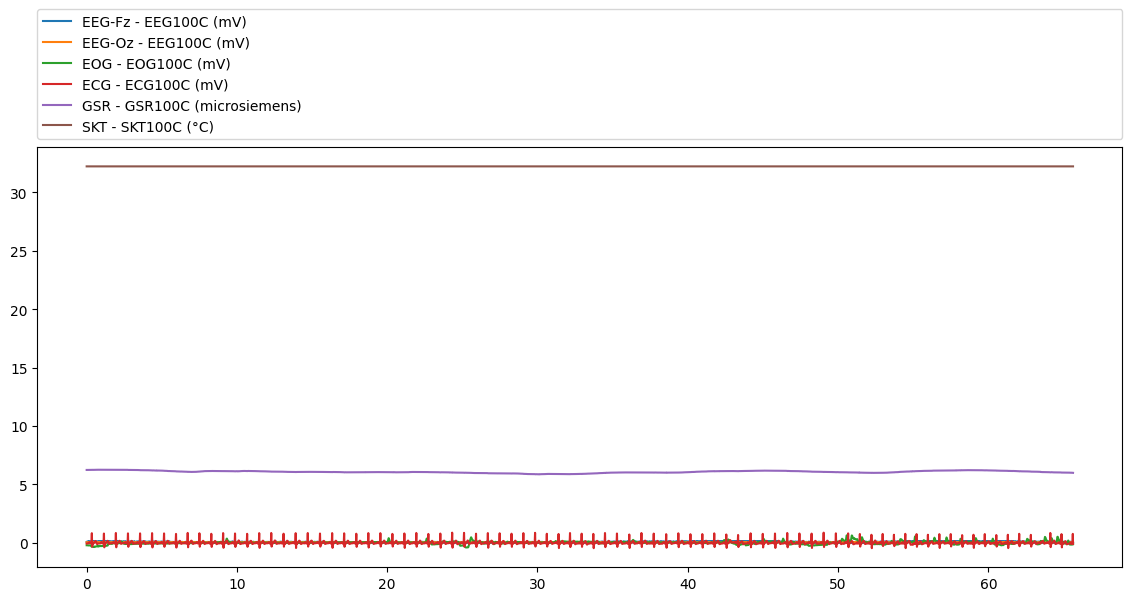

In [ ]:
plt.subplot(211)

for chan in data.channels:
    plt.plot(chan.time_index, chan.data, label='{} ({})'.format(chan.name, chan.units))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
None  # Don't print a silly legend thing

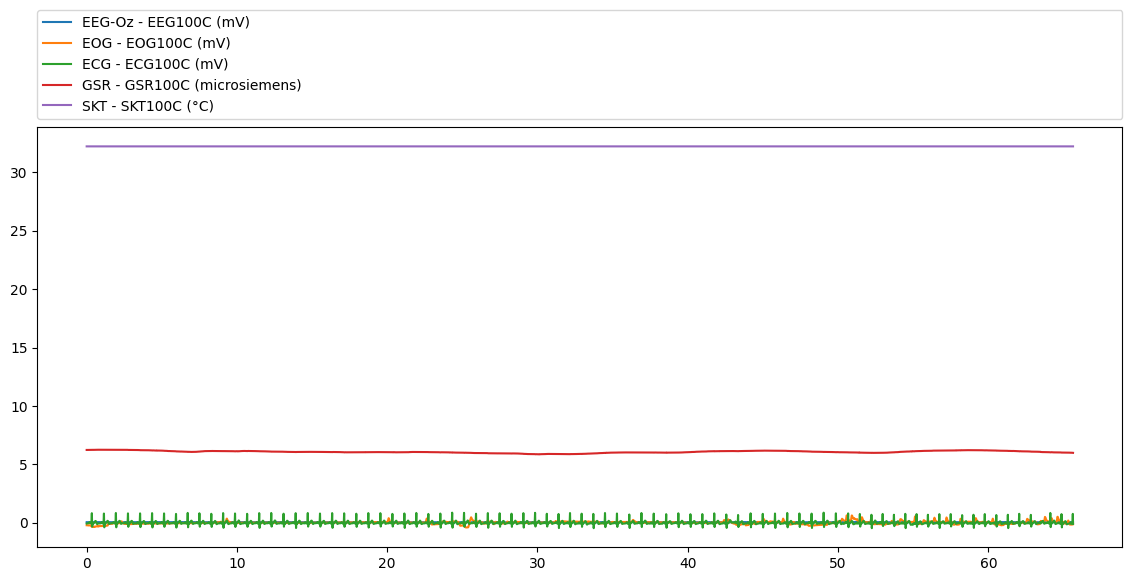

In [ ]:
# The computed channel is putting the others way off-scale, let's exclude it
plt.subplot(211)
for chan in data.channels[1:]:
    plt.plot(chan.time_index, chan.data, label='{} ({})'.format(chan.name, chan.units))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
None  # Don't print a silly legend thing

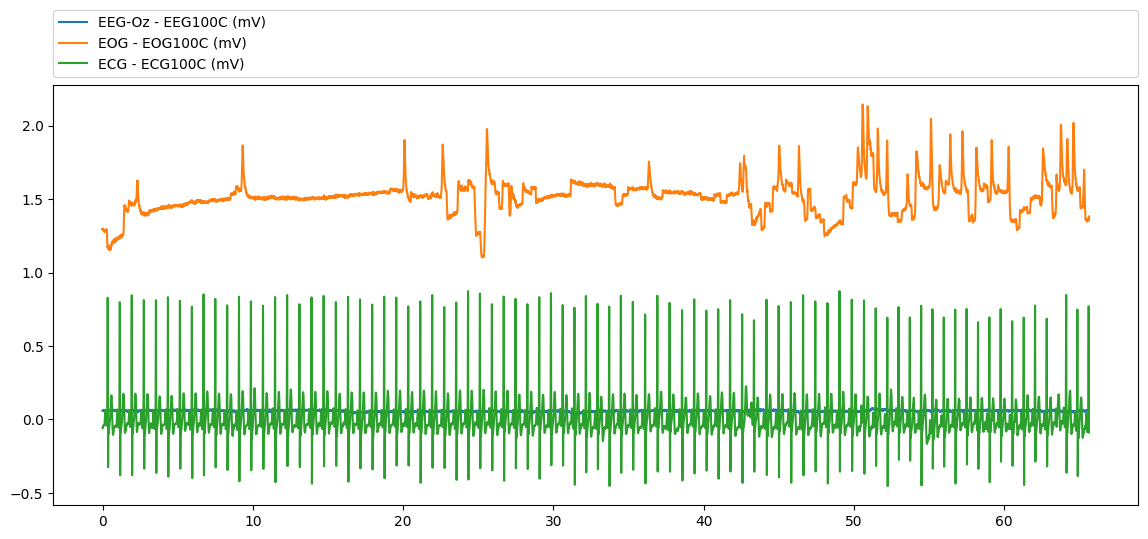

In [ ]:
# And let's separate resp and ekg so we can see their traces better
plt.subplot(211)
ekg = data.channels[1]
resp = data.channels[2]
eda = data.channels[3]
plt.plot(ekg.time_index, ekg.data, label='{} ({})'.format(ekg.name, ekg.units))
plt.plot(resp.time_index, resp.data + 1.5, label='{} ({})'.format(resp.name, resp.units))
plt.plot(eda.time_index, eda.data, label='{} ({})'.format(eda.name, eda.units))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
None  # Don't print a silly legend thing

In [ ]:
for m in data.event_markers:
    print('{0}: Channel {1}, type {2}'.format(m.text, m.channel_name, m.type))

Segment 1: Channel None, type Append
Segment 2: Channel None, type Append




---



In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 45.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets.sleep_physionet.age import fetch_data

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from glob import glob

In [45]:
import mne
# set false if you are not using cuda
mne.utils.set_config('MNE_USE_CUDA', 'false')
"""Read raw data and save in raw_data variable if your file format is different from .cnt see api reference to load it will be like mne.io.read_raw_fif etc"""
path = "/content/drive/MyDrive/Iqram Sir/driving_simlulation/rest.acq"
raw_data = mne.io.read_raw_cnt(path, preload=True).load_data()

"""If we know the channels in which we are interested than we can directly pick the channels by passing there names as  a list"""
raw_data.pick_channels(['FC6', 'FT8', 'C5', 'CP3', 'P3', 'T7', 'CP5',
                        'C3', 'CP1', 'C4'])


<ipython-input-45-48dddf8cfa51>:6: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_data = mne.io.read_raw_cnt(path, preload=True).load_data()
<ipython-input-45-48dddf8cfa51>:6: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw_data = mne.io.read_raw_cnt(path, preload=True).load_data()


ZeroDivisionError: ignored